* [Linear Regression using PyTorch](https://www.geeksforgeeks.org/linear-regression-using-pytorch)

In [ ]:
# Importing Data
from sklearn.datasets import load_boston
boston = load_boston()

from IPython.display import clear_output
clear_output()

import torch
rooms = torch.Tensor(boston.data[:,5])
price = torch.Tensor(boston.target)

In [ ]:
# define model
class LinearRegressionModel(torch.nn.Module):
 
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  # One in and one out
 
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
 
# our model
model = LinearRegressionModel()

In [ ]:
# define loss and optim (how weights are updated)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [ ]:
for epoch in range(5000):
 
    # Forward pass: Compute predicted y by passing x to the model
    # unsqueeze(-1): mat1 and mat2 shapes cannot be multiplied (1x506 and 1x1)
    pred_y = model(rooms.unsqueeze(-1))
 
    # Compute and print loss
    # squeeze(1): Using a target size (torch.Size([506])) that is different to the input size (torch.Size([506, 1])).
    loss = criterion(pred_y.squeeze(1), price)
 
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:  print('epoch {}, loss {}'.format(epoch, loss.item())) 

epoch 0, loss 607.302734375
epoch 100, loss 58.39958953857422
epoch 200, loss 57.70460510253906
epoch 300, loss 57.0422477722168
epoch 400, loss 56.4110107421875
epoch 500, loss 55.80940246582031
epoch 600, loss 55.23605728149414
epoch 700, loss 54.689632415771484
epoch 800, loss 54.16887283325195
epoch 900, loss 53.67256164550781
epoch 1000, loss 53.199562072753906
epoch 1100, loss 52.748779296875
epoch 1200, loss 52.31916046142578
epoch 1300, loss 51.909725189208984
epoch 1400, loss 51.51951217651367
epoch 1500, loss 51.14762878417969
epoch 1600, loss 50.7932014465332
epoch 1700, loss 50.45541763305664
epoch 1800, loss 50.13350296020508
epoch 1900, loss 49.82670593261719
epoch 2000, loss 49.5343132019043
epoch 2100, loss 49.255653381347656
epoch 2200, loss 48.99007797241211
epoch 2300, loss 48.73698043823242
epoch 2400, loss 48.495765686035156
epoch 2500, loss 48.2658805847168
epoch 2600, loss 48.04678726196289
epoch 2700, loss 47.837982177734375
epoch 2800, loss 47.638980865478516
e

In [ ]:
test_rooms = torch.Tensor([8.0])
pred_y = model(test_rooms)
print(pred_y.item())

35.398258209228516


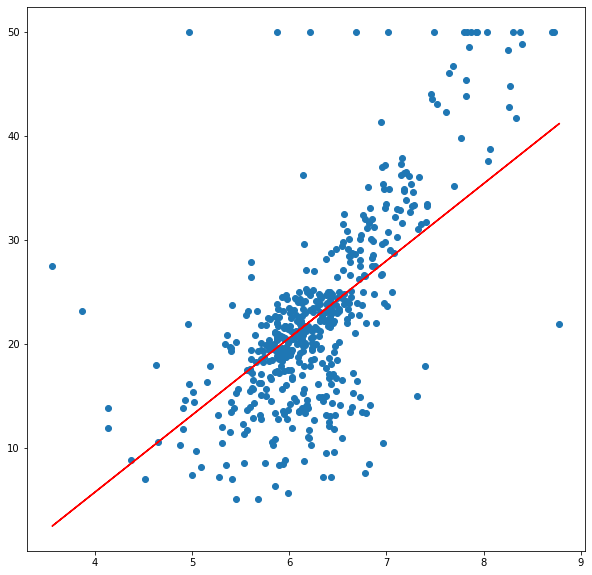

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(rooms,price)

#add line of best fit to plot
neuron = model.linear.state_dict()
plt.plot(rooms, neuron['weight'].item() * rooms + neuron['bias'].item(), '-r')